## Observations and Insights 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [115]:
# Checking the number of mice.
unique = combined_mouse_df["Mouse ID"].value_counts()
print(len(unique))

249


In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

print("Original Dataframe", combined_mouse_df, sep='\n')
print('*** Find Duplicate Rows based on all columns ***')
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = combined_mouse_df[combined_mouse_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Original Dataframe
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [117]:
# Optional: Get all the data for the duplicate mouse ID. 





In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined_mouse_df.set_index("Mouse ID")
df = df.drop(['g989'])




new_index_df = df.reset_index(drop=False)
new_index_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [119]:
# Checking the number of mice in the clean DataFrame. It should be the same number though right? Because you got rid of the duplicates not the mouse completely.
unique_update = new_index_df["Mouse ID"].value_counts()
print(len(unique_update))

248


## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupbymean = new_index_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
groupbymedian = new_index_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
groupbyvar = new_index_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
groupbystd = new_index_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
groupbysem = new_index_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

sumstat_df = pd.DataFrame({'Mean': groupbymean,
                           'Median': groupbymedian,
                          'Variance': groupbyvar,
                          'Standard Deviation': groupbystd,
                          'SEM': groupbysem})

sumstat_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

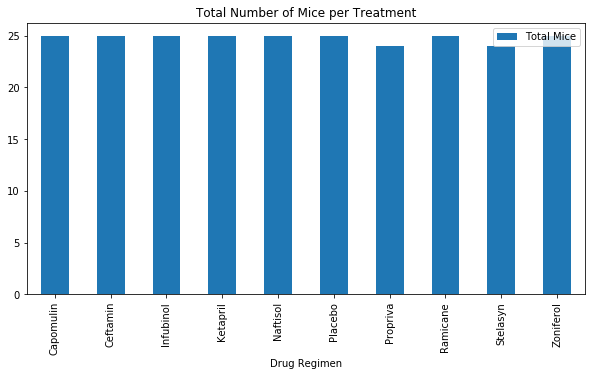

<Figure size 432x288 with 0 Axes>

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
groupbyrows = new_index_df.groupby("Drug Regimen")['Mouse ID'].nunique()
groupbyrows_df = pd.DataFrame({'Total Mice': groupbyrows})


# Use DataFrame.plot() in order to create a bar chart of the data
groupbyrows_df.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Total Number of Mice per Treatment")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Total Mice')

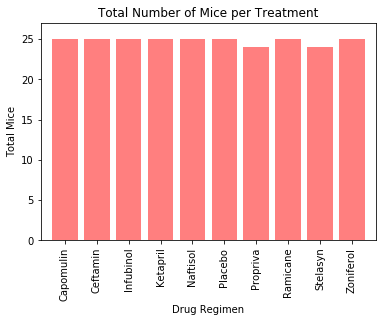

In [145]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(groupbyrows))

plt.bar(x_axis, groupbyrows, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(groupbyrows)+2)

plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")






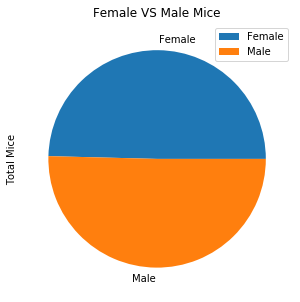

<Figure size 432x288 with 0 Axes>

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Filter the DataFrame down only to those columns to chart
groupbysex = new_index_df.groupby("Sex")['Mouse ID'].nunique()
groupbysex_df = pd.DataFrame({'Total Mice': groupbysex})
groupbysex_df

# Use DataFrame.plot() in order to create a pie chart of the data
groupbysex_df.plot.pie(y='Total Mice', figsize=(5, 5))

# Set a title for the chart
plt.title("Female VS Male Mice")

plt.show()
plt.tight_layout()


/Users/christyrose/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


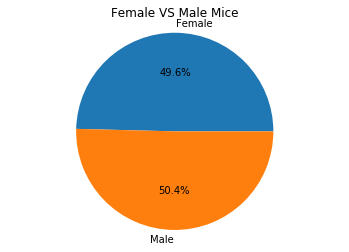

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_labels = 'Female','Male'
plt.pie(groupbysex_df,labels=my_labels,autopct='%1.1f%%')
plt.title('Female VS Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#groupby.last
last_mouse_volume = new_index_df.groupby("Mouse ID").last().reset_index()
last_mouse_volume

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_mouse_df = last_mouse_volume.merge(new_index_df, how='inner', on=['Mouse ID','Timepoint', 'Drug Regimen','Tumor Volume (mm3)'])
# combined_mouse_df
combined_mouse_df

,Mouse ID,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites_x,Sex_y,Age_months_y,Weight (g)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Female,20,23,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,Female,21,25,1
2,a262,Placebo,Female,17,29,45,70.717621,4,Female,17,29,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3,Female,20,28,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1,Female,16,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0,Female,12,26,0
244,z578,Ramicane,Male,11,16,45,30.638696,0,Male,11,16,0
245,z581,Infubinol,Female,24,25,45,62.754451,3,Female,24,25,3
246,z795,Naftisol,Female,13,29,45,65.741070,3,Female,13,29,3


In [126]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"] 
    
    # add subset 
    tumor_vol_data.append(mouse)
    
    # Determine outliers using upper and lower bounds
    quartiles = mouse.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_volume = mouse.loc[(mouse < lower_bound) | (mouse > upper_bound)]
    print(f'The {drug} has {outlier_volume}')


The Capomulin has Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ramicane has Series([], Name: Tumor Volume (mm3), dtype: float64)
The Infubinol has 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The Ceftamin has Series([], Name: Tumor Volume (mm3), dtype: float64)


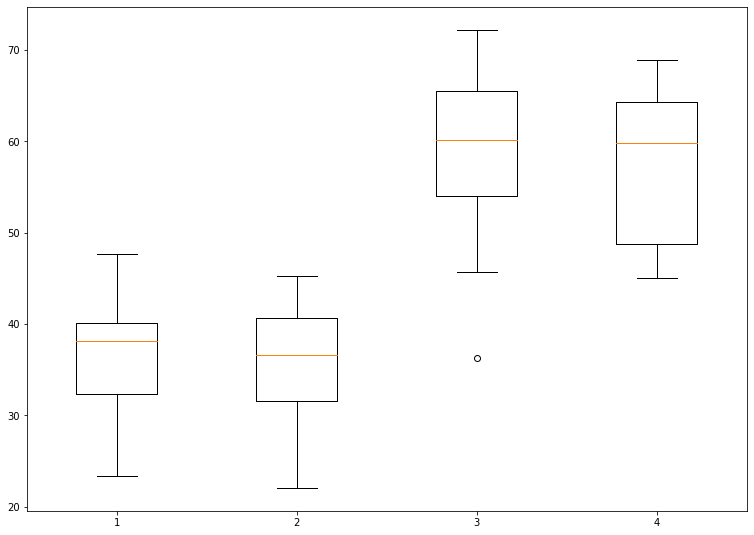

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(tumor_vol_data) 
  
# show plot 
plt.show() 

## Line and Scatter Plots

In [152]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
only_capomulin = new_index_df.loc[new_index_df["Drug Regimen"] == "Capomulin", :]








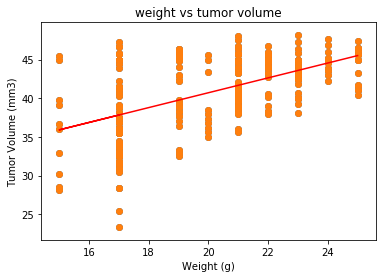

<Figure size 432x288 with 0 Axes>

In [108]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#weight_and_volume = only_capomulin[["Weight (g)","Tumor Volume (mm3)"]]
x_values = only_capomulin['Weight (g)']
y_values = only_capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')




# Use DataFrame.plot() in order to create a line chart of the data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Set a title for the chart
plt.title("weight vs tumor volume")

plt.show()
plt.tight_layout()




## Correlation and Regression

In [103]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = only_capomulin.iloc[:,4]
avgvol = only_capomulin.iloc[:,6]
correlation = st.pearsonr(weight,avgvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.53
